In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import warnings
from pylab import plot,show,hist

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")

In [612]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [613]:
df.isnull().sum().sum()

0

In [614]:
df['age'] = np.log(df['age'])
df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])
df['serum_creatinine'] = np.log(df['serum_creatinine'])

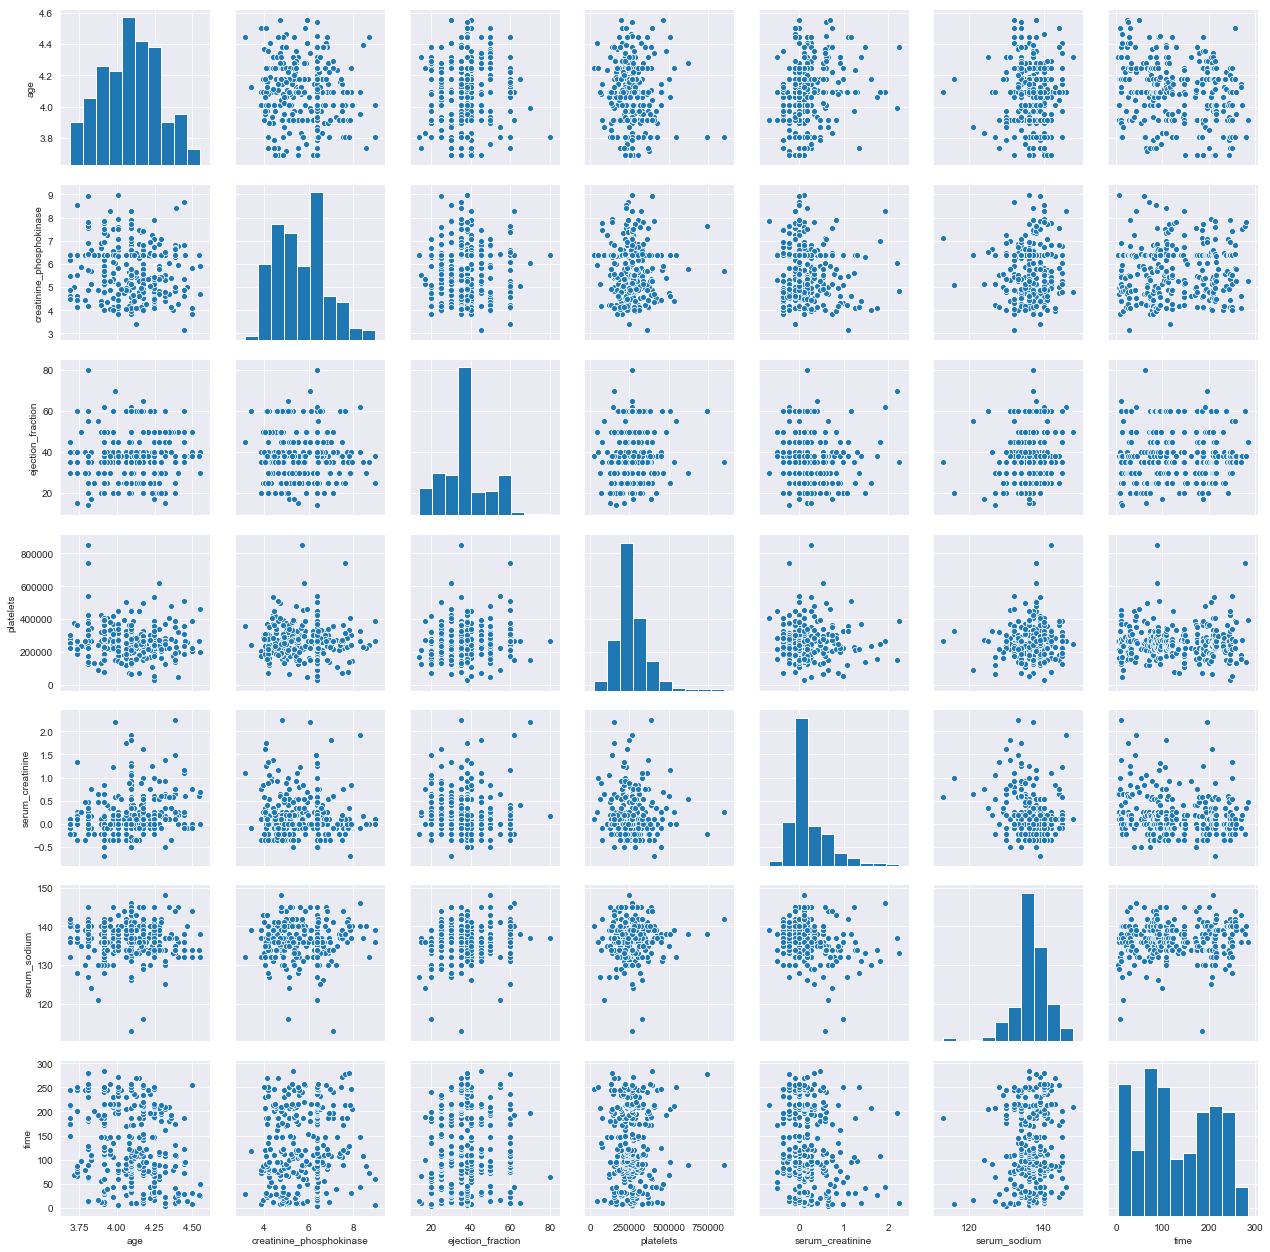

In [615]:
sns.pairplot(df.iloc[:, [0,2,4,6,7,8,11]])

In [616]:
x0 = df.iloc[:, :-1].values
y0 = df.iloc[:,-1].values

[0.09663802 0.02592435 0.07200218 0.03130037 0.12259147 0.02652827
 0.07499427 0.13251416 0.08304547 0.02880801 0.02539044 0.280263  ]


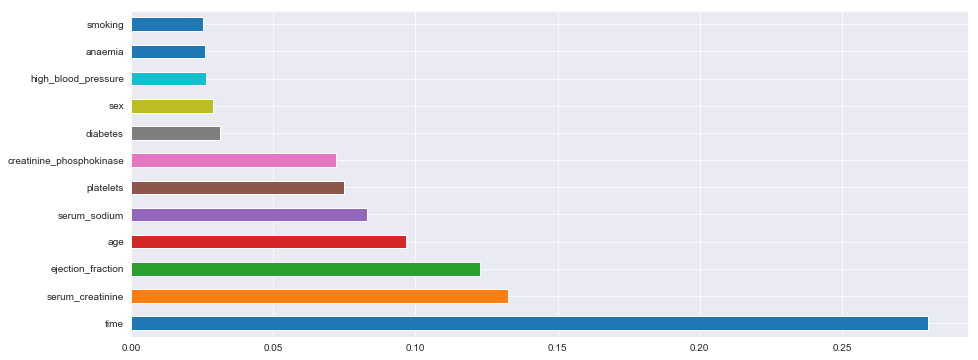

In [617]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Feature: 0, Score: 0.02978
Feature: 1, Score: 0.04365
Feature: 2, Score: 0.08586
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.09375
Feature: 5, Score: 0.01938
Feature: 6, Score: 0.10864
Feature: 7, Score: 0.08828
Feature: 8, Score: 0.03818
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00358
Feature: 11, Score: 0.48889


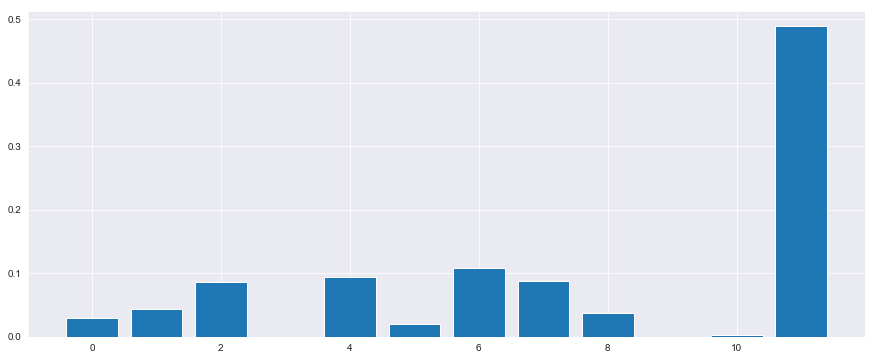

In [618]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
model = DecisionTreeClassifier()
model.fit(x, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00054
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00081
Feature: 3, Score: 0.00004
Feature: 4, Score: -0.00249
Feature: 5, Score: 0.00005
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00033
Feature: 8, Score: 0.01375
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00001
Feature: 11, Score: -0.01997


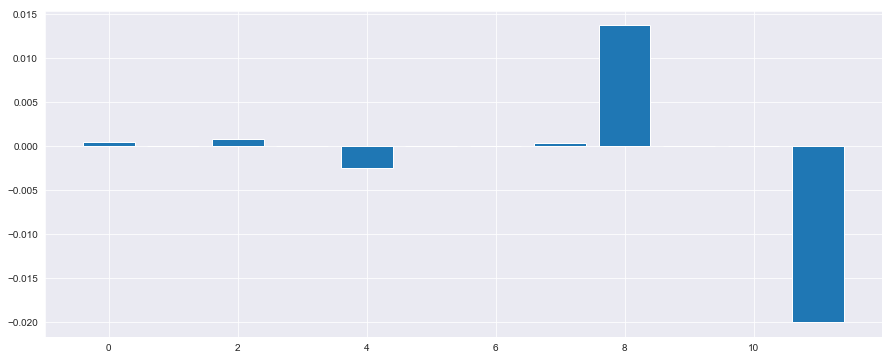

In [619]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model = LogisticRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00334
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.09833
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02676


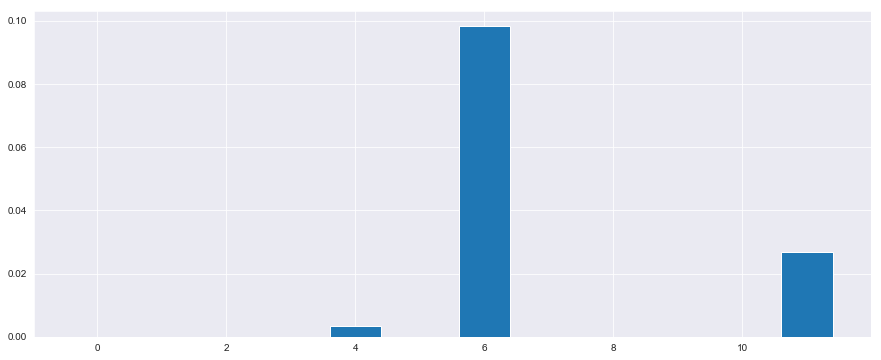

In [620]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
model = KNeighborsClassifier()
model.fit(x, y)
# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

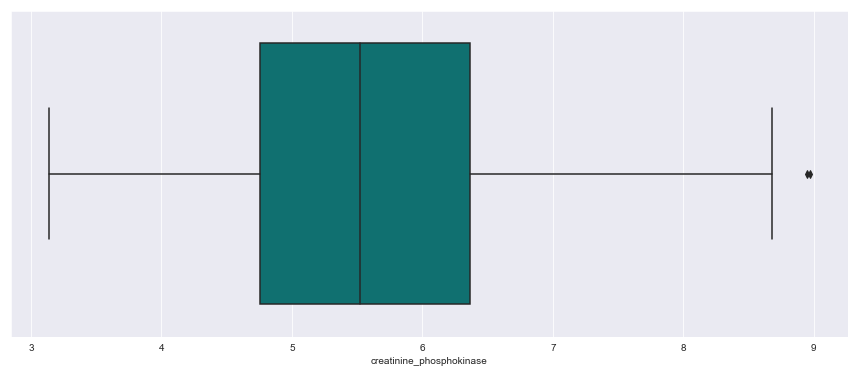

In [621]:
sns.boxplot(x = df.creatinine_phosphokinase, color = 'teal')
plt.show()

In [622]:
q1 = np.percentile(df.creatinine_phosphokinase, 25)
q3 = np.percentile(df.creatinine_phosphokinase, 75)
max = q3+1.5*(q3-q1)
min = q1-1.5*(q3-q1)

In [623]:
np.sum(df['creatinine_phosphokinase'] > max)

2

In [624]:
np.sum(df['creatinine_phosphokinase'] < min)

0

In [625]:
df = df[df['creatinine_phosphokinase']<=max]

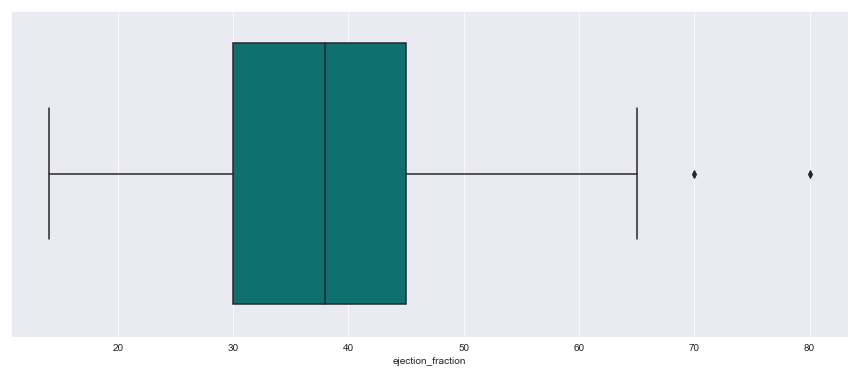

In [626]:
sns.boxplot(x = df.ejection_fraction, color = 'teal')
plt.show()

In [627]:
q1 = np.percentile(df.ejection_fraction, 25)
q3 = np.percentile(df.ejection_fraction, 75)
max = q3+1.5*(q3-q1)
min = q1-1.5*(q3-q1)

In [628]:
np.sum(df['ejection_fraction'] > max)

2

In [629]:
df = df[df['ejection_fraction']<=max]

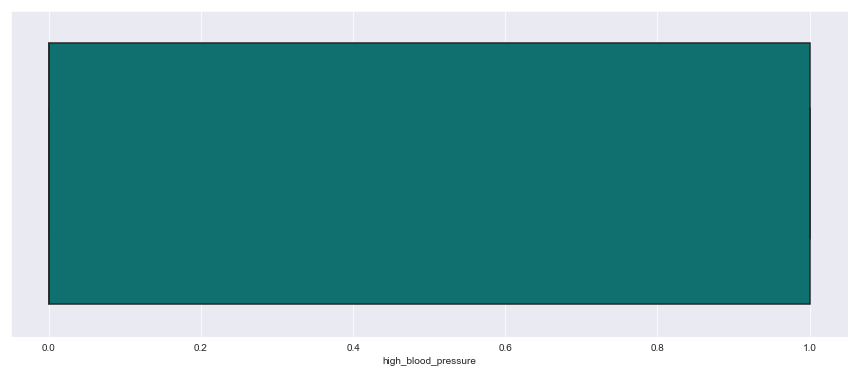

In [630]:
sns.boxplot(x = df.high_blood_pressure, color = 'teal')
plt.show()

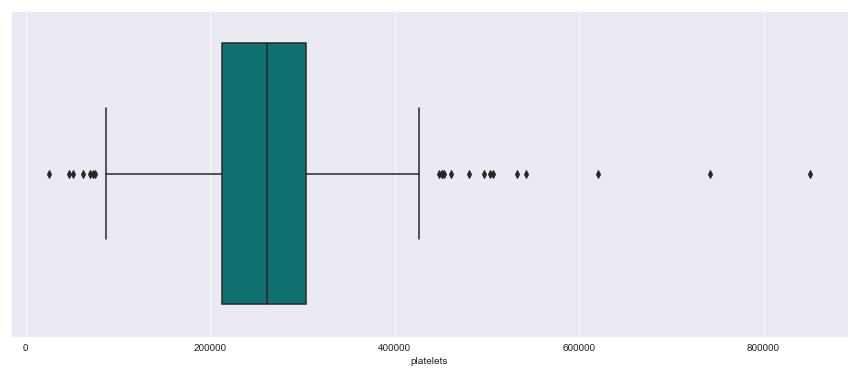

In [631]:
sns.boxplot(x = df.platelets, color = 'teal')
plt.show()

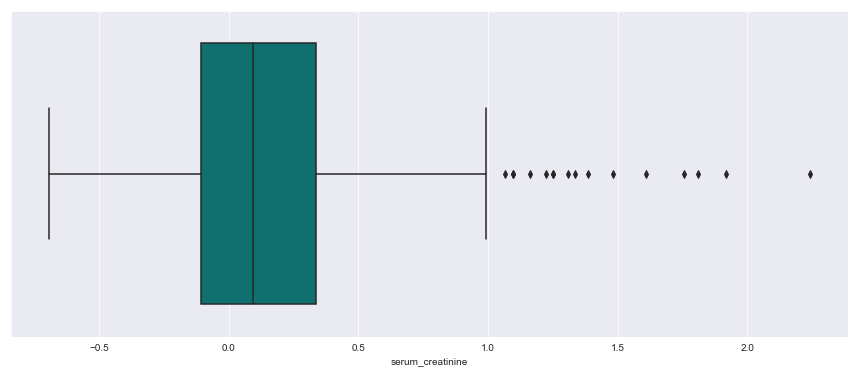

In [632]:
sns.boxplot(x = df.serum_creatinine, color = 'teal')
plt.show()

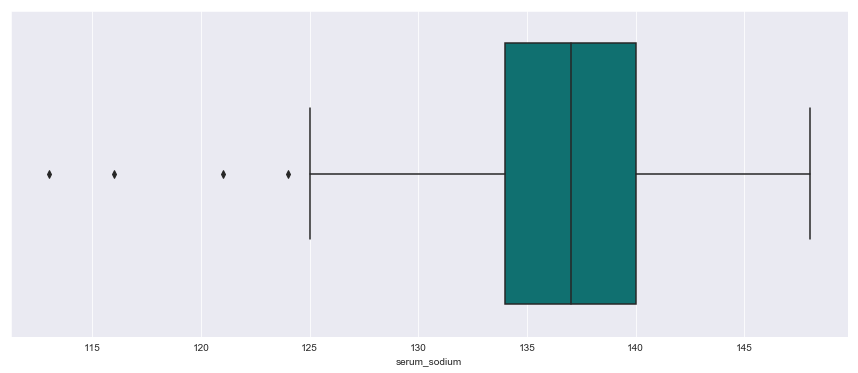

In [633]:
sns.boxplot(x = df.serum_sodium, color = 'teal')
plt.show()

In [634]:
q1 = np.percentile(df.serum_sodium, 25)
q3 = np.percentile(df.serum_sodium, 75)
max = q3+1.5*(q3-q1)
min = q1-1.5*(q3-q1)

In [635]:
np.sum(df['serum_sodium'] < min)

4

In [636]:
df = df[df['serum_sodium']>=min]

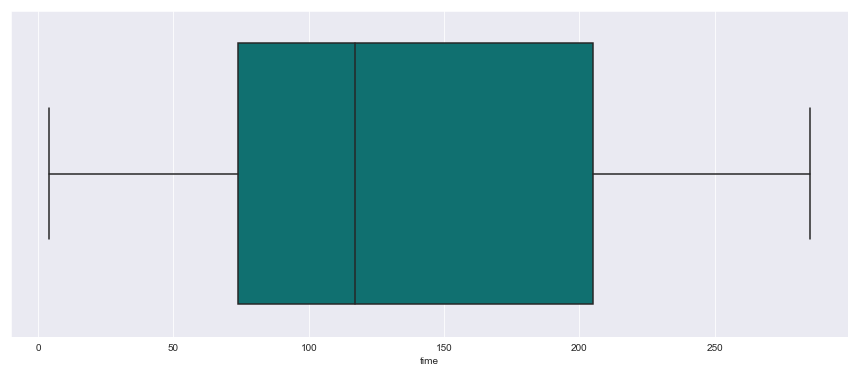

In [637]:
sns.boxplot(x = df.time, color = 'teal')
plt.show()

In [638]:
df.shape

(291, 13)

In [639]:
mylist = []

In [640]:
x0 = df.iloc[:, [0,2, 4,7,8, 11]].values
y0 = df.iloc[:,-1].values
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size = 0.2, random_state =6)
x0_train = sc.fit_transform(x0_train)
x0_test = sc.transform(x0_test)
classifier = LogisticRegression()
classifier.fit(x0_train, y0_train)
y0_pred = classifier.predict(x0_test)
cm = confusion_matrix(y0_test, y0_pred)
ac = accuracy_score(y0_test, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[35  5]
 [ 5 14]]
0.8305084745762712


In [641]:
y0_pred = classifier.predict(x0_train)
ac = accuracy_score(y0_train, y0_pred)
cm = confusion_matrix(y0_train, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[146  15]
 [ 23  48]]
0.8362068965517241


In [661]:
x1 = df.iloc[:, :-1].values
y1 = df.iloc[:,-1].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state =3)
classifier = LogisticRegression()
classifier.fit(x1_train, y1_train)
y1_pred = classifier.predict(x1_test)
cm = confusion_matrix(y1_test, y1_pred)
ac = accuracy_score(y1_test, y1_pred)
print(cm)
print(ac)

[[33  5]
 [ 6 15]]
0.8135593220338984


In [662]:
y1_pred = classifier.predict(x1_train)
ac = accuracy_score(y1_train, y1_pred)
cm = confusion_matrix(y1_train, y1_pred)
print(cm)
print(ac)

[[145  18]
 [ 22  47]]
0.8275862068965517


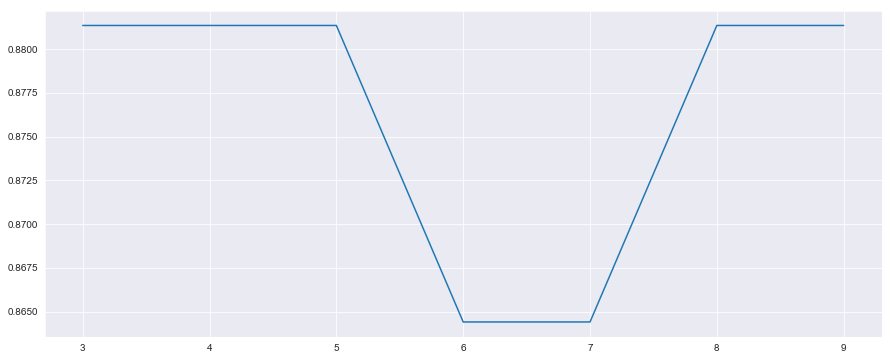

In [644]:
x0 = df.iloc[:, [4,7,11]].values
y0 = df.iloc[:,-1].values
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size = 0.2, random_state =2)
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(x0_train, y0_train)
    y0_pred = classifier.predict(x0_test)
    list1.append(accuracy_score(y0_test,y0_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [666]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x0_train, y0_train)
y0_pred = classifier.predict(x0_test)
cm = confusion_matrix(y0_test, y0_pred)
ac = accuracy_score(y0_test, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[59  8]
 [ 5 16]]
0.8522727272727273


In [667]:
y0_pred = classifier.predict(x0_train)
ac = accuracy_score(y0_train, y0_pred)
cm = confusion_matrix(y0_train, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[129   5]
 [ 12  57]]
0.916256157635468


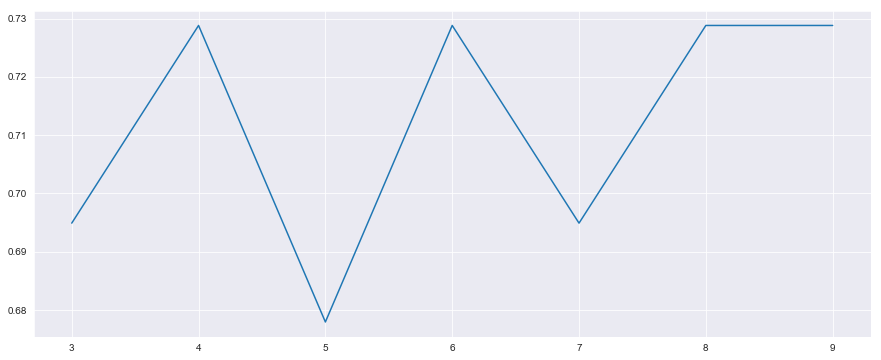

In [647]:
x1 = df.iloc[:, :-1].values
y1 = df.iloc[:,-1].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state =0)
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(x1_train, y1_train)
    y1_pred = classifier.predict(x1_test)
    list1.append(accuracy_score(y1_test,y1_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [648]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x1_train, y1_train)
y1_pred = classifier.predict(x1_test)
cm = confusion_matrix(y1_test, y1_pred)
ac = accuracy_score(y1_test, y1_pred)
mylist.append(ac)
print(cm)
print(ac)

[[43  2]
 [14  0]]
0.7288135593220338


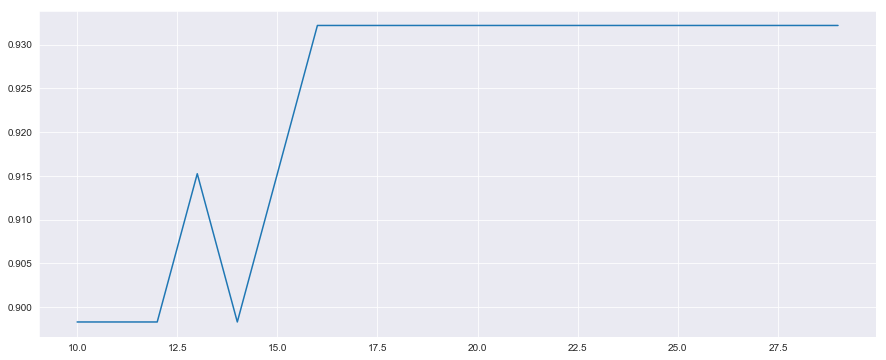

In [649]:
x0 = df.iloc[:, [2, 4, 6, 7, 8, 11]].values
y0 = df.iloc[:,-1].values
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size = 0.2, random_state =0)
from sklearn.ensemble import RandomForestClassifier
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x0_train, y0_train)
    y0_pred = classifier.predict(x0_test)
    list1.append(accuracy_score(y0_test,y0_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [650]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 18, criterion='entropy', random_state=0)
classifier.fit(x0_train,y0_train)
y0_pred = classifier.predict(x0_test)
cm = confusion_matrix(y0_test, y0_pred)
ac = accuracy_score(y0_test, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[44  1]
 [ 3 11]]
0.9322033898305084


In [651]:
y0_pred = classifier.predict(x0_train)
cm = confusion_matrix(y0_train, y0_pred)
ac = accuracy_score(y0_train, y0_pred)
mylist.append(ac)
print(cm)
print(ac)

[[156   0]
 [  1  75]]
0.9956896551724138


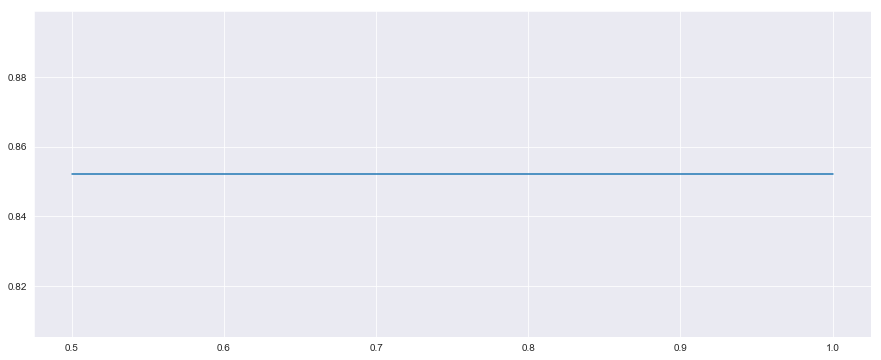

In [652]:
from sklearn.svm import SVC
x0 = df.iloc[:, [4,7,11]].values
y0 = df.iloc[:,-1].values
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size = 0.3, random_state =2)
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x0_train, y0_train)
    y0_pred = classifier.predict(x0_test)
    list1.append(accuracy_score(y0_test,y0_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [653]:

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x0_train, y0_train)
y0_pred = classifier.predict(x0_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y0_test, y0_pred)
ac = accuracy_score(y0_test, y0_pred)
print(cm)
print(ac)
mylist.append(ac)

[[62  5]
 [ 8 13]]
0.8522727272727273


In [654]:
y0_pred = classifier.predict(x0_train)
cm = confusion_matrix(y0_train, y0_pred)
ac = accuracy_score(y0_train, y0_pred)
print(cm)
print(ac)
mylist.append(ac)

[[130   4]
 [ 24  45]]
0.8620689655172413


In [655]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()
classifier.fit(x0_train, y0_train)
y0_pred = classifier.predict(x0_test)

cm = confusion_matrix(y0_test, y0_pred)
ac = accuracy_score(y0_test, y0_pred)
print(cm)
print(ac)
mylist.append(ac)

[[58  9]
 [ 7 14]]
0.8181818181818182


In [656]:
y0_pred = classifier.predict(x0_train)
cm = confusion_matrix(y0_train, y0_pred)
ac = accuracy_score(y0_train, y0_pred)
print(cm)
print(ac)
mylist.append(ac)

[[119  15]
 [ 19  50]]
0.8325123152709359


In [657]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(x1_train, y1_train)
y1_pred = classifier.predict(x1_test)
cm = confusion_matrix(y1_test, y1_pred)
ac = accuracy_score(y1_test, y1_pred)
print(cm)
print(ac)
mylist.append(ac)


[[40  5]
 [ 8  6]]
0.7796610169491526


In [658]:
y1_pred = classifier.predict(x1_train)
cm = confusion_matrix(y1_train, y1_pred)
ac = accuracy_score(y1_train, y1_pred)
print(cm)
print(ac)
mylist.append(ac)


[[141  15]
 [ 15  61]]
0.8706896551724138


In [659]:
print("test/train accuracy of method logistic regression  0.83050/0.83620")
print("test/train accuracy of method KNeigbors  0.88135/0.90948")
print("test/train accuracy of method RandomForest  0.93220/0.99568")
print("test/train accuracy of method SVC  0.85227/0.86206")
print("test/train accuracy of method LDA  0.81818/0.83251")
print("test/train accuracy of method QDA  0.77966/0.87068")

test/train accuracy of method logistic regression  0.83050/0.83620
test/train accuracy of method KNeigbors  0.88135/0.90948
test/train accuracy of method RandomForest  0.93220/0.99568
test/train accuracy of method SVC  0.85227/0.86206
test/train accuracy of method LDA  0.81818/0.83251
test/train accuracy of method QDA  0.77966/0.87068
